In [1]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd
import os

# Data import
Data obtained from https://github.com/mfcovington/jtk-cycle (see `Example2_data.txt`)

In [2]:
df = file_parser.read_csv(os.path.join("test_data","Example2_JTK.txt"))
tests = df.test.unique()

Single-component models

In [3]:
r1 = cosinor.fit_group(df, n_components=1, plot=False)

Multi-component models

In [4]:
r3 = cosinor.fit_group(df, n_components=[1,2,3], plot=False)
r3 = cosinor.get_best_models(df, r3, n_components = [1,2,3])

Find the cases for which single-component models fail and multi-component models don't

In [5]:
cases = set(r3.loc[r3.q <= 0.05, "test"]) & set(r3.loc[r1.q > 0.05, "test"])
len(cases)

11

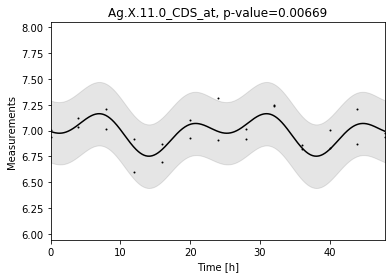

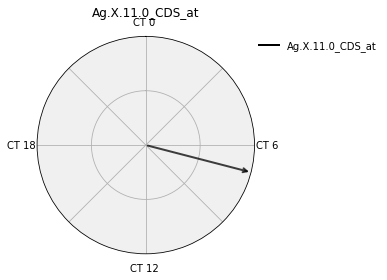

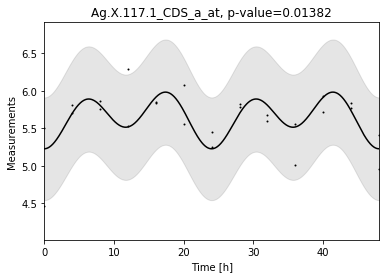

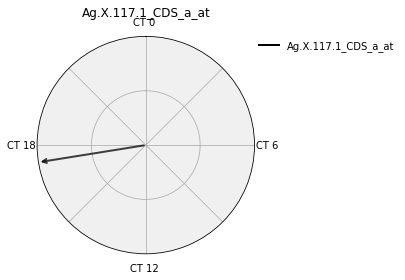

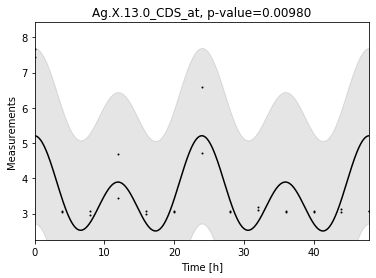

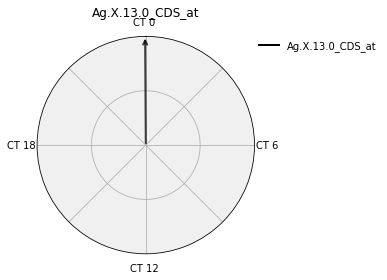

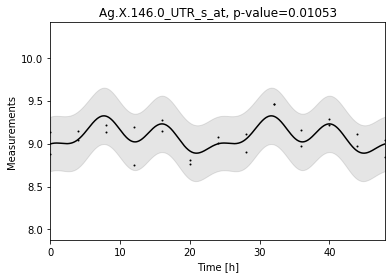

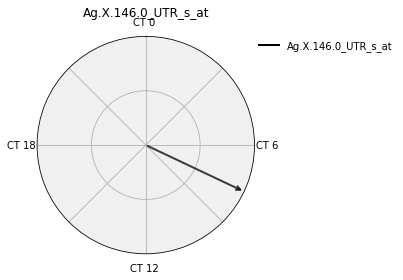

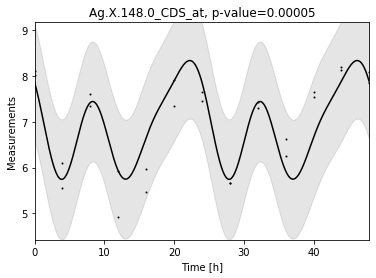

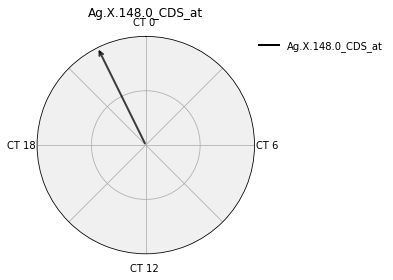

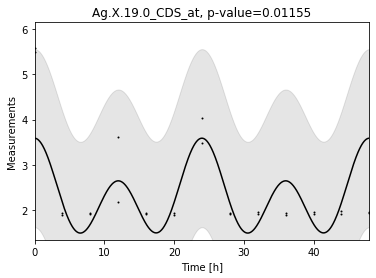

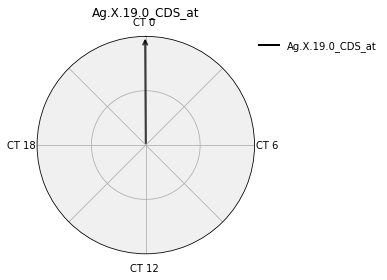

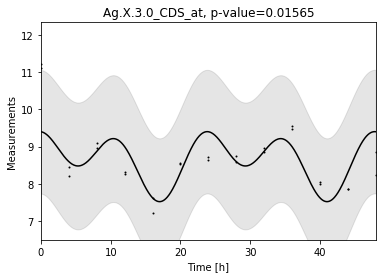

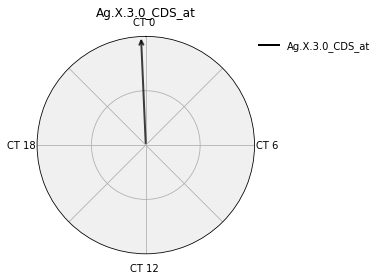

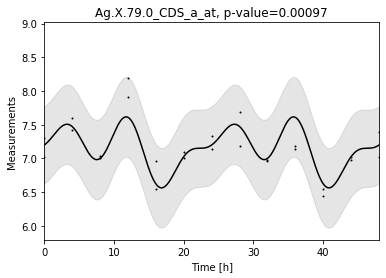

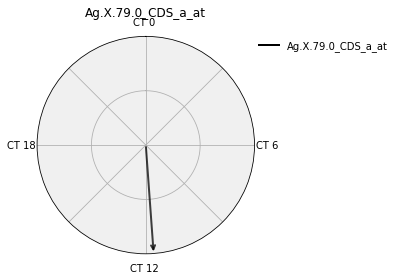

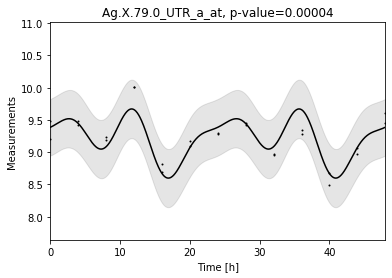

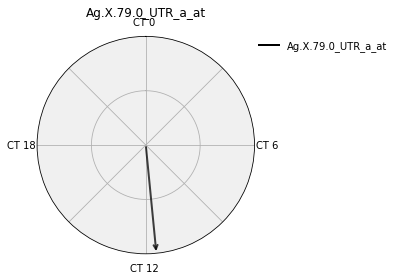

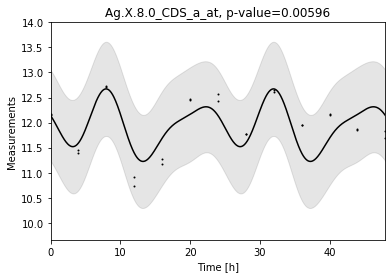

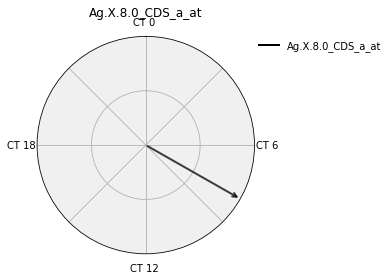

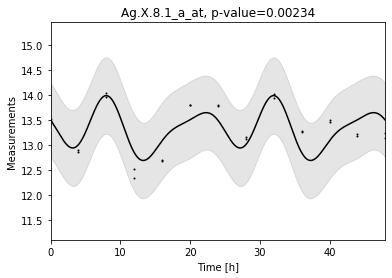

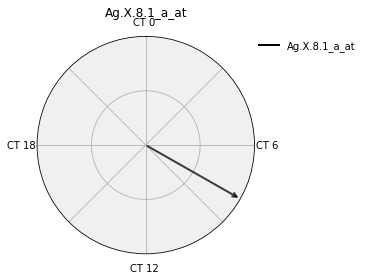

In [6]:
df2 = df[df['test'].isin(cases)]
df_models = r3[r3['test'].isin(cases)]
cosinor.plot_df_models(df2, df_models)

In [7]:
len(tests)

250